# The 2020 Democrats Presidential Candidates


#Sentiment Analysis: Positive, Negative and Neutral
#Random Forest:
"To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. One big advantage of random forest is, that it"
https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

In [3]:
import pandas as pd # To hande data
import numpy as np # To compute numbers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import tweepy # To consume Twitter's api
from textblob import TextBlob
import re
# plotting and  visualizaion
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Getting data using a scrapper provided

by http://www.trumptwitterarchive.com  or https://github.com/bpb27/twitter_scraping

In [5]:
# Through Selenium Python API you can access all functionalities of Selenium WebDriver in an intuitive way.
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
from time import sleep
import json
import datetime


In [7]:
user = 'MichaelBennet'
start = datetime.datetime(2019, 4, 20)
end = datetime.datetime(2019, 5, 7)

In [11]:
#Run Chrome Driver
delay = 1  # time to wait on each page load before reading the page
driver = webdriver.Chrome(r'C:\Users\YooSarina\Desktop\Project\chromedriver.exe')

In [12]:
# Get data from twitter
twitter_ids_filename = 'all_ids.json'
days = (end - start).days + 1
id_selector = '.time a.tweet-timestamp'
tweet_selector = 'li.js-stream-item'
user = user.lower()
ids = []

def format_day(date):
    day = '0' + str(date.day) if len(str(date.day)) == 1 else str(date.day)
    month = '0' + str(date.month) if len(str(date.month)) == 1 else str(date.month)
    year = str(date.year)
    return '-'.join([year, month, day])

def form_url(since, until):
    p1 = 'https://twitter.com/search?f=tweets&vertical=default&q=from%3A'
    p2 =  user + '%20since%3A' + since + '%20until%3A' + until + 'include%3Aretweets&src=typd'
    return p1 + p2

def increment_day(date, i):
    return date + datetime.timedelta(days=i)

for day in range(days):
    d1 = format_day(increment_day(start, 0))
    d2 = format_day(increment_day(start, 1))
    url = form_url(d1, d2)
    print(url)
    print(d1)
    driver.get(url)
    sleep(delay)

    try:
        found_tweets = driver.find_elements_by_css_selector(tweet_selector)
        increment = 10

        while len(found_tweets) >= increment:
            print('scrolling down to load more tweets')
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
            sleep(delay)
            found_tweets = driver.find_elements_by_css_selector(tweet_selector)
            increment += 10

        print('{} tweets found, {} total'.format(len(found_tweets), len(ids)))

        for tweet in found_tweets:
            try:
                id = tweet.find_element_by_css_selector(id_selector).get_attribute('href').split('/')[-1]
                ids.append(id)
            except StaleElementReferenceException as e:
                print('lost element reference', tweet)

    except NoSuchElementException:
        print('no tweets on this day')

    start = increment_day(start, 1)


try:
    with open(twitter_ids_filename) as f:
        all_ids = ids + json.load(f)
        data_to_write = list(set(all_ids))
        print('tweets found on this scrape: ', len(ids))
        print('total tweet count: ', len(data_to_write))
except FileNotFoundError:
    with open(twitter_ids_filename, 'w') as f:
        all_ids = ids
        data_to_write = list(set(all_ids))
        print('tweets found on this scrape: ', len(ids))
        print('total tweet count: ', len(data_to_write))

with open(twitter_ids_filename, 'w') as outfile:
    json.dump(data_to_write, outfile)

print('all done here')
driver.close()


https://twitter.com/search?f=tweets&vertical=default&q=from%3Amichaelbennet%20since%3A2019-04-20%20until%3A2019-04-21include%3Aretweets&src=typd
2019-04-20
0 tweets found, 0 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Amichaelbennet%20since%3A2019-04-21%20until%3A2019-04-22include%3Aretweets&src=typd
2019-04-21
0 tweets found, 0 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Amichaelbennet%20since%3A2019-04-22%20until%3A2019-04-23include%3Aretweets&src=typd
2019-04-22
2 tweets found, 0 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Amichaelbennet%20since%3A2019-04-23%20until%3A2019-04-24include%3Aretweets&src=typd
2019-04-23
3 tweets found, 2 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Amichaelbennet%20since%3A2019-04-24%20until%3A2019-04-25include%3Aretweets&src=typd
2019-04-24
2 tweets found, 5 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Amichaelbennet%20since%3A2019-04-25%20u

In [13]:
# Mass Data 
import tweepy
import json
import math
import glob
import csv
import zipfile
import zlib
from tweepy import TweepError
from time import sleep
import unicodedata
user = 'MichaelBennet'
# Consumer keys and access tokens, used for OAuth
consumer_key = 'MKFuTmc28rZ8UARafp6Xc9R6f'
consumer_secret = 'uuw9QolA6jEfDNVCi0YNLBYOGyk44FIqQOjPPHLH60JAUMhl8o'
#Access
access_token = '797075677946277888-CBRjWMulthQ1RD94GJ5ZojA4sFPzixj'
access_token_secret = 'fpjUviOHzgGxzWiOYLrrSQ6SJb52qhRd6QESbCs7VzirK'

# OAuth
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth) 

user = user.lower()
output_file = '{}.json'.format(user)
output_file_short = '{}_short.json'.format(user)
compression = zipfile.ZIP_DEFLATED

with open('all_ids.json') as f:
    ids = json.load(f)

print('total ids: {}'.format(len(ids)))

all_data = []
start = 0
end = 100
limit = len(ids)
i = math.ceil(limit / 100)

for go in range(i):
    print('currently getting {} - {}'.format(start, end))
    sleep(6)  # needed to prevent hitting API rate limit
    id_batch = ids[start:end]
    start += 100
    end += 100
    tweets = api.statuses_lookup(id_batch)
    for tweet in tweets:
        all_data.append(dict(tweet._json))

print('metadata collection complete')
print('creating master json file')
with open(output_file, 'w') as outfile:
    json.dump(all_data, outfile)

print('creating ziped master json file')
zf = zipfile.ZipFile('{}.zip'.format(user), mode='w')
zf.write(output_file, compress_type=compression)
zf.close()

results = []

def is_retweet(entry):
    return 'retweeted_status' in entry.keys()

def get_source(entry):
    if '<' in entry["source"]:
        return entry["source"].split('>')[1].split('<')[0]
    else:
        return entry["source"]

with open(output_file) as json_data:
    data = json.load(json_data)
    for entry in data:
        t = {
            "created_at": entry["created_at"],
            "text": entry["text"],
            "in_reply_to_screen_name": entry["in_reply_to_screen_name"],
            "retweet_count": entry["retweet_count"],
            "favorite_count": entry["favorite_count"],
            "source": get_source(entry),
            "id_str": entry["id_str"],
            "is_retweet": is_retweet(entry)
        }
        results.append(t)

print('creating minimized json master file')
with open(output_file_short, 'w') as outfile:
    json.dump(results, outfile)


total ids: 55
currently getting 0 - 100
metadata collection complete
creating master json file
creating ziped master json file
creating minimized json master file


In [15]:
# Open File
with open(r'C:\Users\YooSarina\Desktop\Project\michaelbennet_short.json') as f:
    jsondata = json.load(f)

normalized_json = pd.io.json.json_normalize(jsondata)

tweets = pd.DataFrame(normalized_json)
#Covert Pandas to Datetime
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.text.fillna(tweets.text, inplace=True)

In [16]:
#Sorty by time
tweets.sort_values(['created_at'], ascending=True,inplace=True)
tweets.head(2)

,created_at,favorite_count,id_str,in_reply_to_screen_name,is_retweet,retweet_count,source,text
22,2019-04-22 16:40:44+00:00,130,1120366837865250817,None,False,21,Twitter Web Client,Good. Now do Stephen Moore. https://t.co/UFgFT...
50,2019-04-22 20:33:50+00:00,58,1120425502085349376,None,False,9,Twitter Web Client,Let’s make a promise to our children to leave ...


In [17]:
# Drop unnecessary columns
tweets.drop(['id_str','in_reply_to_screen_name','is_retweet'], axis=1, inplace=True)
tweets.head(3)

,created_at,favorite_count,retweet_count,source,text
22,2019-04-22 16:40:44+00:00,130,21,Twitter Web Client,Good. Now do Stephen Moore. https://t.co/UFgFT...
50,2019-04-22 20:33:50+00:00,58,9,Twitter Web Client,Let’s make a promise to our children to leave ...
27,2019-04-23 13:45:51+00:00,130,26,Twitter Web Client,We have to figure out how to govern this count...


# 2. Descriptive Analysis

Total Tweets from Nov.1. 2016 to Feb. 17 2019

In [18]:
tweets.shape

(55, 5)

In [19]:
tweets.columns

Index(['created_at', 'favorite_count', 'retweet_count', 'source', 'text'], dtype='object')

In [20]:
tweets.isnull().sum()

created_at        0
favorite_count    0
retweet_count     0
source            0
text              0
dtype: int64

In [21]:
# Total tweets for the priod 
print ('Total tweets start from April 20, 2019 to May 7,2019 : ',len(tweets.index),'\n')

Total tweets start from April 20, 2019 to May 7,2019 :  55 



In [22]:
# Retweets
tweet_retweets = tweets.sort_values(by='retweet_count', ascending=False)
tweet_retweets= tweet_retweets.reset_index(drop=True)
print ('Average retweets:', round(tweet_retweets['retweet_count'].mean(),2), '\n')
print ('Top 5 Retweets:')
for i in range(5): #iloc to prinit row until i
    print (tweet_retweets['text'].iloc[i], '-', tweet_retweets['retweet_count'].iloc[i])

Average retweets: 64.22 

Top 5 Retweets:
My cancer operation cost $53,000. That could've bankrupted people without insurance. Yet we have a President who wa… https://t.co/0AnLT7l2xi - 670
We cannot be the first generation to leave less to our kids, not more. 

That’s why I’m running for President. Let’… https://t.co/4YFBCfLlaK - 375
Here’s what Michael wrote and published today that he’s discussing with @Maddow. - Team Bennet

https://t.co/PKlgp2hCsp - 281
Republicans in the Senate rejected a Nobel Laureate economist’s nomination for the Federal Reserve during the Obama… https://t.co/jZjw6WscUz - 247
It’s time to build the future we want, or one we don’t want will be thrust upon us.

I’m running for President to b… https://t.co/GoPn8HrXRW - 234


In [23]:
# Likes
tweet_likes = tweets.sort_values(by='favorite_count', ascending=False)
tweet_likes = tweet_likes.reset_index(drop=True)
print ('Average likes:', round(tweet_likes['favorite_count'].mean(),2), '\n')
print ('Top 5 Liked:')
for i in range(5):
    print (tweet_likes['text'].iloc[i], '-', tweet_likes['favorite_count'].iloc[i])


Average likes: 253.25 

Top 5 Liked:
My cancer operation cost $53,000. That could've bankrupted people without insurance. Yet we have a President who wa… https://t.co/0AnLT7l2xi - 2718
We cannot be the first generation to leave less to our kids, not more. 

That’s why I’m running for President. Let’… https://t.co/4YFBCfLlaK - 1646
Here’s what Michael wrote and published today that he’s discussing with @Maddow. - Team Bennet

https://t.co/PKlgp2hCsp - 763
We need a genuine, new progressive era to fix our politics. We need to overturn Citizens United, ban partisan gerry… https://t.co/yzVbClR7R4 - 687
When I think about Mitch McConnell and the Freedom Caucus, I think of people who are completely immune to give and… https://t.co/HPhEOM6GF0 - 658


In [29]:
# Find mostly used words
from collections import Counter

import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


custom_stop_words = list(ENGLISH_STOP_WORDS)

# RegEx for stopwords
# \b backslash B word boundary(white space)
#?:It's called a 'non-capturing group', which means the regex would not make a group by the match inside the parenteses like it would otherwise do (normally, a parenthesis creates a group).
# format() will replace {}. {} for expandsion
# | means either or
RE_stopwords = r'\b(?:{})\b'.format('|'.join(custom_stop_words))

words = (tweets.text
           .str.lower()
           .replace([r'\|',RE_stopwords ], [' ', ''], regex=True)
           .str.cat(sep=' ') # Concatenate  strings in a series/index with given seperater
           .split()
)
words


['good.',
 'stephen',
 'moore.',
 'https://t./ufgftyz65d',
 'let’s',
 'make',
 'promise',
 'children',
 'leave',
 'better',
 'planet.',
 '#earthday',
 'https://t./wkgf2efdrs',
 'figure',
 'govern',
 'country',
 '.',
 'freedom',
 'caucus',
 '&amp;',
 '@realdonaldtrump,',
 '’',
 'witnes…',
 'https://t./mdxsatawrz',
 'agree',
 '@jayinslee.',
 '#climatechange',
 'forefront',
 'race',
 'deserves',
 'thoughtful',
 '…',
 'https://t./zqdovthss2',
 'need',
 'fix',
 'broken',
 'health',
 'care',
 '.',
 '#medicarex',
 'public',
 'option',
 'designed',
 'increase',
 'competition',
 'lo…',
 'https://t./9aytofohd8',
 'words,',
 '@realdonaldtrump:',
 'drain.',
 '.',
 'swamp.',
 'https://t./fz5mzzylji',
 'partisan',
 'gerrymandering,',
 'politicians',
 'choose',
 'voters',
 '--taking',
 'away',
 'voice.',
 '’s',
 'just',
 'wrong.',
 '’m',
 'l…',
 'https://t./q9era5icrk',
 'middle-class',
 'life',
 'increasingly',
 'reach',
 'americans.',
 '40%',
 'adults',
 'trouble',
 'paying',
 'health',
 'c…',
 'ht

In [26]:
# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')

words_data = words_data.reset_index()

words_data.head(50)

,Word,Frequency
0,need,9
1,.,8
2,…,7
3,’s,6
4,’m,6
5,health,5
6,american,5
7,running,5
8,",",4
9,build,4


# 3. Sentiment Analysis

3.1. Preview the sentiment column.

In [39]:
# textblob for simplified text processing for sentiment analysis
from textblob import TextBlob
#import re
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
# Using textblob, sentences classify the polarity of a tweet
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [41]:
# Create a column to show the results of analysis
tweets['Sentiment'] = np.array([ analize_sentiment(tweet) for tweet in tweets['text'] ])
tweets.head(5)

,created_at,favorite_count,retweet_count,source,text,Sentiment
22,2019-04-22 16:40:44+00:00,130,21,Twitter Web Client,Good. Now do Stephen Moore. https://t.co/UFgFT...,positive
50,2019-04-22 20:33:50+00:00,58,9,Twitter Web Client,Let’s make a promise to our children to leave ...,positive
27,2019-04-23 13:45:51+00:00,130,26,Twitter Web Client,We have to figure out how to govern this count...,neutral
41,2019-04-23 16:04:11+00:00,60,12,Twitter Web Client,Agree with @JayInslee. #ClimateChange should b...,positive
15,2019-04-23 22:11:00+00:00,14,6,TweetDeck,We need to fix our broken health care system. ...,negative


In [42]:
# Create a column to show the results of analysis
tweets['Sentiment'] = np.array([ analize_sentiment(tweet) for tweet in tweets['text'] ])
tweets.tail(5)

,created_at,favorite_count,retweet_count,source,text,Sentiment
37,2019-05-06 18:40:10+00:00,165,43,Twitter Web Client,"Annoy @TedCruz, chip in $1 to send me to the d...",neutral
21,2019-05-06 20:25:50+00:00,85,26,Twitter Media Studio,Special interests spent $17 million attacking ...,positive
16,2019-05-06 23:15:00+00:00,86,16,TweetDeck,I’m running to build opportunity for every Ame...,neutral
39,2019-05-07 01:41:15+00:00,116,9,Twitter for iPhone,Back today from a memorable first official tri...,positive
3,2019-05-07 04:00:40+00:00,60,14,Twitter for iPhone,We stand behind Israel's right to self defense...,negative


3.2 Analyzing the results
What percentage of reviews are positive, neutral, and negative?

In [43]:
tweets['Sentiment'].value_counts() / len(tweets)

positive    0.472727
neutral     0.363636
negative    0.163636
Name: Sentiment, dtype: float64

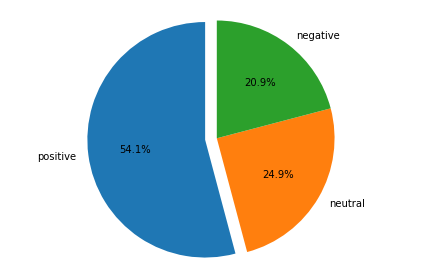

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

labels = ['positive', 'neutral', 'negative']
sizes = [54.148, 24.94, 20.91]

# Create a pie chart
plt.pie( sizes, labels=labels,shadow=False, explode=(0.1,0,0),startangle=90,autopct='%1.1f%%')

# axis('equal') changes limits of x or y axis so that equal increments of x and y have the same length; a circle is circular
plt.axis('equal')

# Plot
plt.tight_layout()
plt.show()

3.3 Load in the Sentiment IntensityAnalyzer from Vader and add compound, negative, neutral, and positive scores into the DataFrame.

In [45]:
import nltk
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YooSarina\AppData\Roaming\nltk_data...


True

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
#VADER to calculate sentiment see if you can correctly predict the hand-tagged sentiment.
compound= []
neg = []
neu = []
pos = []
for tweet in tweets['text']:
    sent = sia.polarity_scores(tweet)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

In [47]:
tweets['compound'] = compound
tweets['neg'] = neg
tweets['neu'] = neu
tweets['pos'] = pos

compound = score/math.sqrt((score**2)+15)

In [48]:
tweets.head()

,created_at,favorite_count,retweet_count,source,text,Sentiment,compound,neg,neu,pos
22,2019-04-22 16:40:44+00:00,130,21,Twitter Web Client,Good. Now do Stephen Moore. https://t.co/UFgFT...,positive,0.4404,0.000,0.633,0.367
50,2019-04-22 20:33:50+00:00,58,9,Twitter Web Client,Let’s make a promise to our children to leave ...,positive,0.6124,0.073,0.610,0.317
27,2019-04-23 13:45:51+00:00,130,26,Twitter Web Client,We have to figure out how to govern this count...,neutral,0.6369,0.000,0.819,0.181
41,2019-04-23 16:04:11+00:00,60,12,Twitter Web Client,Agree with @JayInslee. #ClimateChange should b...,positive,0.6249,0.000,0.769,0.231
15,2019-04-23 22:11:00+00:00,14,6,TweetDeck,We need to fix our broken health care system. ...,negative,0.3400,0.121,0.664,0.215


3.4 Store tweet sentiment in y to use as labels and create an appropriate feature matrix, X

In [49]:
y = tweets['Sentiment']
X = tweets[['compound', 'neg', 'neu', 'pos']]

3.5 Fit a model of your choice to predict tweets sentient and cross-validate.

In [50]:
#ramdomeforest: create bunch of decision tree and got the one the most accurate(majority vote)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

In [51]:
rf.fit(X,y)

C:\Users\YooSarina\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
#estimate how accurately a predictive model will perform in practice
score=cross_val_score(rf, X, y)
print('Cross Validation of Random Forest is  :{:3f} '.format(score.mean()))

Cross Validation of Random Forest is  :0.448916 


C:\Users\YooSarina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=14)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

3.6 Display the confusion matrix.
What reviews are difficult to identify?

Text(0.5, 1.0, 'Confusion Matrix')

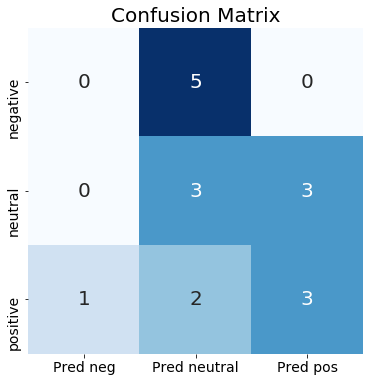

In [54]:
conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)

3.7 Print the classification report.

In [55]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         5
     neutral       0.30      0.50      0.37         6
    positive       0.50      0.50      0.50         6

   micro avg       0.35      0.35      0.35        17
   macro avg       0.27      0.33      0.29        17
weighted avg       0.28      0.35      0.31        17

